In [1]:
##########################################    Importing libraries     #############################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as matpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [2]:
#########################################  Data Section     ########################################################

data = pd.read_csv("/content/diabetes.csv")
columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[columns] = data[columns].replace(0, np.NaN)
data = data.dropna()

nlen = int(len(data)*0.70)


Xtrain = data.iloc[:nlen, 0:8].values
Xtest = data.iloc[nlen:, 0:8].values
Ytrain = data.iloc[:nlen, 8:9].values
Ytest = data.iloc[nlen:, 8:9].values

scaler_xtrain = MinMaxScaler()
xtrain_sc = scaler_xtrain.fit_transform(Xtrain)

scaler_xtest = MinMaxScaler()
xtest_sc = scaler_xtest.fit_transform(Xtest)

ones_tn = np.ones(shape = (xtrain_sc.shape[0],1))
xtrain_sc = np.hstack([ones_tn, xtrain_sc])

ones_ts = np.ones(shape = (xtest_sc.shape[0],1))
xtest_sc = np.hstack([ones_ts, xtest_sc])


In [3]:
####################################################### Helper Functions ##################################################

def intializer(layers):
  np.random.seed(3)
  W = np.random.randn(layers[0], layers[1])  
  return (W)

def sigmoid(z):
  sig = 1.0/(1.0+np.exp(-z))
  return (sig)

def decision_fn(A):                                                            
  dec = np.where(A > 0.5, 1, 0)
  return(dec)

def predict(X, W):
  Z = np.dot(X, W)
  A = sigmoid(Z)
  A = decision_fn(A)
  return (A)

def minimumcost(vault):
  ix = vault[4].index(min(vault[4]))                         
  W = vault[0][ix]
  W = W.T
  return (W)


def SPLPrediction(X,Y,W):
  pred = predict(X, W)
  accuracy = accuracy_score(Y, pred)*100
  f1 = f1_score(Y, pred)*100
  misclassification = 100-accuracy
  result = [accuracy, f1, misclassification]
  return (result)

In [4]:

###################################################### Algorithm ####################################################

def SPLGD(X,Y,lr,epochs,layers):
  weights = []
  zpred = []
  Apred = []
  errpred = []
  costs = []
  grads = []
  vault = []
  W = intializer(layers)
  for epoch in range(epochs):
    Z = np.dot(X, W)
    A = sigmoid(Z)
    error = A - Y
    m = A.shape[0]
    loss = np.dot(Y.T, np.log(A)) + np.dot((1-Y.T),np.log(1-A))
    cost = -np.sum(loss)/m
    grad =np.dot(X.T, error)
    weights.append((W.T))
    zpred.append(Z.T)
    Apred.append(A.T)
    errpred.append(error.T)
    costs.append(cost)
    grads.append(grad.T)
    W = W - (lr/m)*(grad)
    vault = [weights, zpred, Apred, errpred, costs, grads]
  return (vault)

use 70% train and 30%test splits for data in all tests

TEST-1

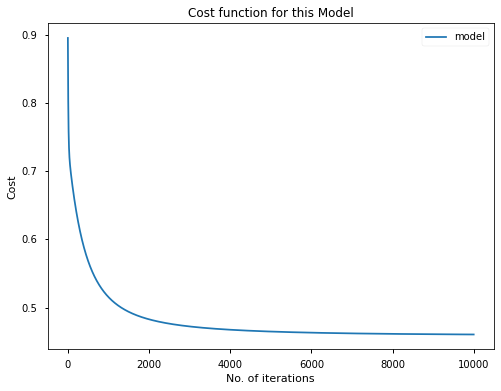

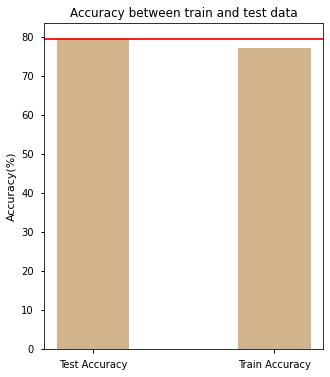

In [5]:
layersT1 = [xtrain_sc.shape[1],1]
lrT1 = 0.1
Tepochs1 = 10000
vaultT1 = SPLGD(X = xtrain_sc, Y =Ytrain, layers = layersT1, lr =lrT1, epochs = Tepochs1)
cost1 = np.asarray(vaultT1[4]).reshape(Tepochs1,1)

plt.figure(figsize = (8,6))
plt.style.use(style = 'seaborn-notebook')
plt.plot(cost1, label = "model")
plt.title("Cost function for this Model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")  
plt.legend()
plt.show()


Wmin1 = minimumcost(vaultT1)
testpred1 = SPLPrediction(xtest_sc, Ytest, Wmin1)
trainpred1 = SPLPrediction(xtrain_sc, Ytrain, Wmin1)

plt.figure(figsize = (5,6))
plt.bar(x = ['Test Accuracy', 'Train Accuracy'], height = [testpred1[0], trainpred1[0]], width = 0.4, color = 'tan')
plt.axhline(y = testpred1[0], color = 'r')
plt.title("Accuracy between train and test data")
plt.ylabel("Accuracy(%)")
plt.show()



In [6]:
testpred1

[79.66101694915254, 72.09302325581396, 20.33898305084746]

TEST-2

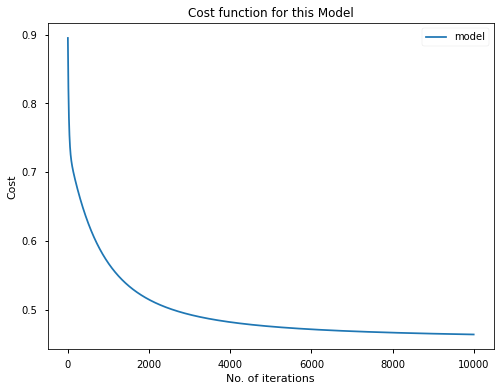

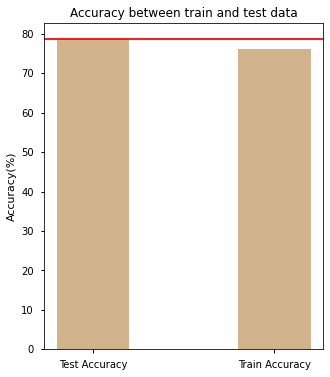

In [7]:
layersT2 = [xtrain_sc.shape[1],1]
lrT2 = 0.05
Tepochs2 = 10000
vaultT2 = SPLGD(X = xtrain_sc, Y =Ytrain, layers = layersT2, lr =lrT2, epochs = Tepochs2)
cost2 = np.asarray(vaultT2[4]).reshape(Tepochs2,1)

plt.figure(figsize = (8,6))
plt.style.use(style = 'seaborn-notebook')
plt.plot(cost2, label = "model")
plt.title("Cost function for this Model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")  
plt.legend()
plt.show()


Wmin2 = minimumcost(vaultT2)
testpred2 = SPLPrediction(xtest_sc, Ytest, Wmin2)
trainpred2 = SPLPrediction(xtrain_sc, Ytrain, Wmin2)

plt.figure(figsize = (5,6))
plt.bar(x = ['Test Accuracy', 'Train Accuracy'], height = [testpred2[0], trainpred2[0]], width = 0.4, color = 'tan')
plt.axhline(y = testpred2[0], color = 'r')
plt.title("Accuracy between train and test data")
plt.ylabel("Accuracy(%)")
plt.show()

In [8]:
testpred2

[78.8135593220339, 71.26436781609196, 21.186440677966104]

TEST-3

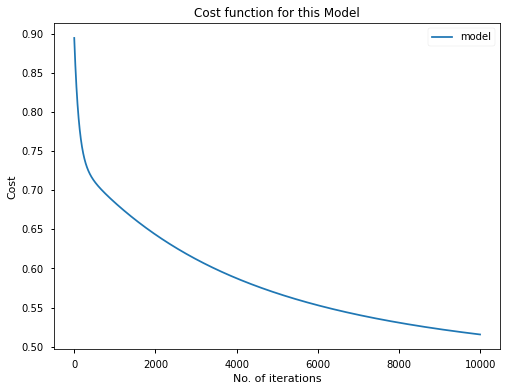

Accuracy for the test data is:  80.50847457627118
Accuracy for the train data is:  74.81751824817519


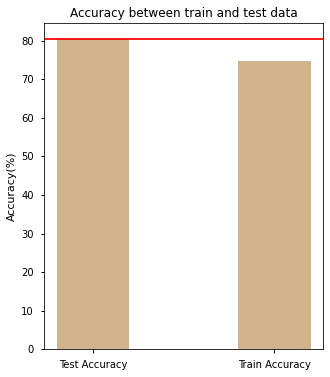

In [9]:
layersT3 = [xtrain_sc.shape[1],1]
lrT3 = 0.01
Tepochs3 = 10000
vaultT3 = SPLGD(X = xtrain_sc, Y =Ytrain, layers = layersT3, lr =lrT3, epochs = Tepochs3)
cost3 = np.asarray(vaultT3[4]).reshape(Tepochs3,1)

plt.figure(figsize = (8,6))
plt.style.use(style = 'seaborn-notebook')
plt.plot(cost3, label = "model")
plt.title("Cost function for this Model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")  
plt.legend()
plt.show()


Wmin3 = minimumcost(vaultT3)
testpred3 = SPLPrediction(xtest_sc, Ytest, Wmin3)
trainpred3 = SPLPrediction(xtrain_sc, Ytrain, Wmin3)

print("Accuracy for the test data is: ", testpred3[0])
print("Accuracy for the train data is: ", trainpred3[0])

plt.figure(figsize = (5,6))
plt.bar(x = ['Test Accuracy', 'Train Accuracy'], height = [testpred3[0], trainpred3[0]], width = 0.4, color = 'tan')
plt.axhline(y = testpred3[0], color = 'r')
plt.title("Accuracy between train and test data")
plt.ylabel("Accuracy(%)")
plt.show()

In [10]:
testpred3

[80.50847457627118, 69.33333333333334, 19.491525423728817]

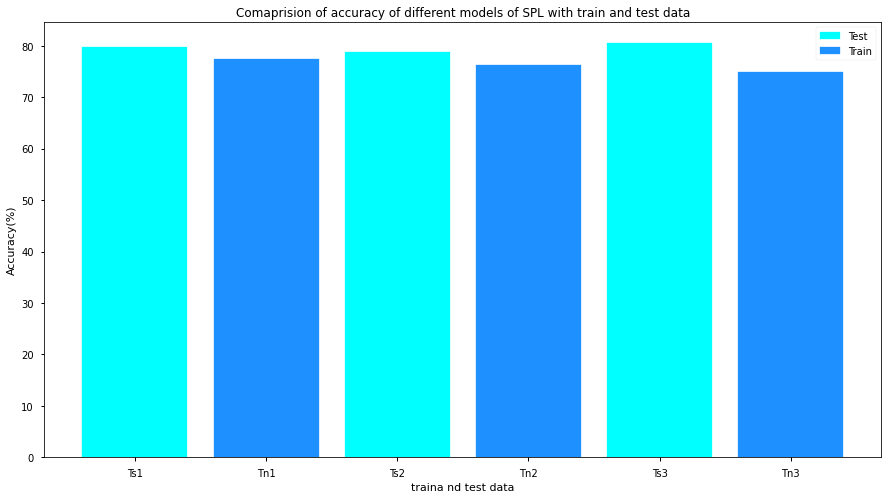

In [11]:
# overall performace :

plt.figure(figsize = (15,8))
bar1 = plt.bar(x = ['Ts1', 'Tn1'],height= [testpred1[0], trainpred1[0]])
bar2 = plt.bar(x = ['Ts2', 'Tn2'],height= [testpred2[0], trainpred2[0]])
bar3 = plt.bar(x = ['Ts3', 'Tn3'],height= [testpred3[0], trainpred3[0]])


bar1[0].set_color('cyan')
bar2[0].set_color('cyan')
bar3[0].set_color('cyan')


bar1[1].set_color('dodgerblue')
bar2[1].set_color('dodgerblue')
bar3[1].set_color('dodgerblue')


cyan = matpatches.Patch(color = 'cyan', label = 'Test')
dodge = matpatches.Patch(color='dodgerblue', label = 'Train')

plt.title("Comaprision of accuracy of different models of SPL with train and test data")
plt.xlabel("traina nd test data")
plt.ylabel("Accuracy(%)")
plt.legend(handles = [cyan, dodge])
plt.show()

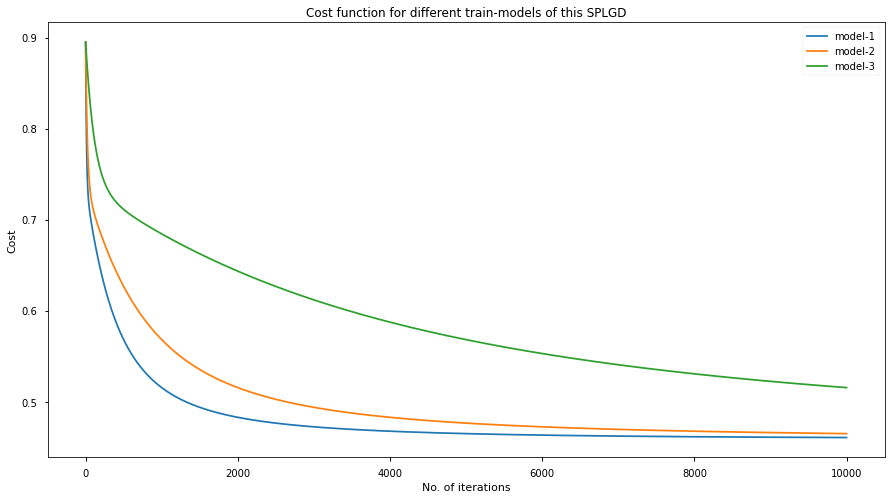

In [12]:
plt.figure(figsize = (15,8))
plt.style.use(style = 'seaborn-notebook')
plt.plot(cost1, label = "model-1")
plt.plot(cost2, label = "model-2")
plt.plot(cost3, label = "model-3")

plt.title("Cost function for different train-models of this SPLGD")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [13]:
LR = [0.1, 0.05, 0.01]
Iter = [10000, 10000, 10000]
Accu = [testpred1[0], testpred2[0], testpred3[0]]
F1 = [testpred1[1], testpred2[1], testpred3[1]]
Mis = [testpred1[2], testpred2[2], testpred3[2]]
def ReportResults(LR, Iter, Accu, F1, Mis):
  results = {'Learning Rate':LR , 'Iterations':Iter , 'Accuracy': Accu, 'F1 score': F1, 'Misclassification': Mis}
  return (pd.DataFrame.from_dict(results))


In [14]:
ReportResults(LR, Iter, Accu, F1, Mis)

,Learning Rate,Iterations,Accuracy,F1 score,Misclassification
0,0.10,10000,79.661017,72.093023,20.338983
1,0.05,10000,78.813559,71.264368,21.186441
2,0.01,10000,80.508475,69.333333,19.491525
